# Keyword extraction with PyTextRank

Practical course material for the ASDM Class 09 (Text Mining) by Florian Leitner.

© 2017 Florian Leitner. All rights reserved.

## Setup

### PyTextRank

A Python implemention of TextRank, on steroids:
    
```bash
pip3 install pytextrank
```

In [2]:
import pytextrank

### JSON sample data

In [22]:
import json
from IPython.display import HTML

raw_json_doc = '''
{
    "id": "777",
    "text": "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."
}
'''

example_doc = json.loads(raw_json_doc)
HTML(example_doc['text'])

### NLTK stopwords

In [23]:
from nltk.corpus import stopwords

stopwords_en = (set(stopwords.words('english')) | set(["also"]))

## Usage

### NLP of the document with SpaCy

In [24]:
# slightly confusing API, as it expects not a single "doc", but a list of documents
sentences = list(graf._asdict() for graf in pytextrank.parse_doc([example_doc]))

In [25]:
len(sentences)

4

In [26]:
print(json.dumps(sentences[0]))#, indent=4))

{"id": "777", "sha1": "7b982e54fa330a6854a0ed5397d49223fdc70645", "graf": [[1, "Compatibility", "compatibility", "NN", 1, 0], [0, "of", "of", "IN", 0, 1], [2, "systems", "system", "NNS", 1, 2], [0, "of", "of", "IN", 0, 3], [3, "linear", "linear", "JJ", 1, 4], [4, "constraints", "constraint", "NNS", 1, 5], [0, "over", "over", "IN", 0, 6], [0, "the", "the", "DT", 0, 7], [5, "set", "set", "NN", 1, 8], [0, "of", "of", "IN", 0, 9], [6, "natural", "natural", "JJ", 1, 10], [7, "numbers", "number", "NNS", 1, 11], [0, ".", ".", ".", 0, 12]]}


### Conversion to token graph

PyTextRank has a slightly confusing API, but here's how get to the graph building call for a document's parsed sentences:

In [32]:
graph = pytextrank.pytextrank.build_graph(sentences)

Plotting the token graph:

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


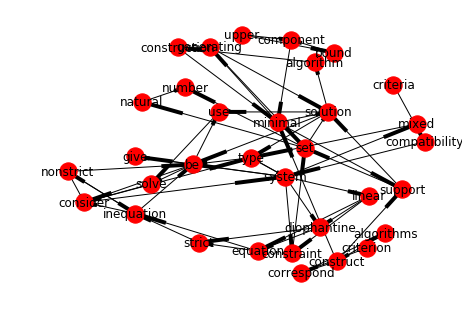

In [33]:
%pylab inline --no-import-all
nx.draw(graph, with_labels=True)
plt.show()

### PageRank analytics with [networkx](https://networkx.github.io/)

In [34]:
import networkx as nx

ranks = nx.pagerank(graph)

### Join keyword phrases and produce a ranked result

In [36]:
for keyword in pytextrank.normalize_key_phrases(sentences, ranks, stopwords=stopwords_en):
    if keyword.rank > 0.02: # arbitrary cutoff
        print("{:.5f} {}".format(keyword.rank, keyword.text))
    else:
        break

0.12574 systems
0.08887 types systems
0.07068 minimal set
0.05167 strict inequations
0.04533 considered
0.04443 types
0.04443 mixed types
0.03566 natural numbers
0.03534 set
0.03534 minimal generating sets
0.03514 solutions
0.03101 linear constraints
0.02792 diophantine
0.02792 linear diophantine equations
0.02757 solving
0.02584 inequations
0.02584 nonstrict inequations


## Conclusion

PyTextRank is quite nice, just its API might need some polish.
It can also be used for summary extraction (but we've already seen that on day 2).